In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Int64Index([0, 1], dtype='int64')
0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, '数量')

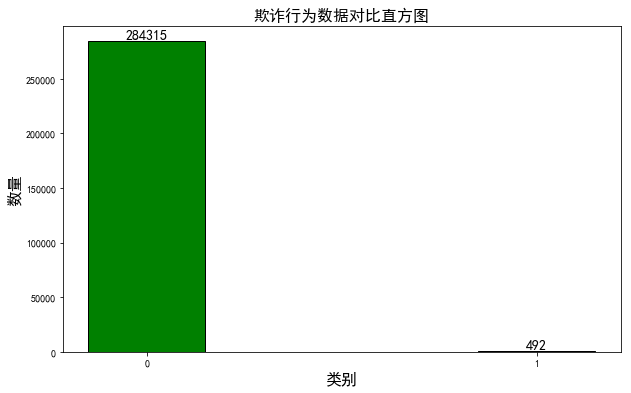

In [3]:
count_classes = pd.value_counts(data['Class']).sort_index()#和data['Class'].value_counts().sort_index()功能一样
#pd.value_counts()统计频数,返回一个series结构，sort_index()根据索引排序
print(count_classes.index)
print(count_classes)
fig=plt.figure(figsize=(10,6))
plt.xticks([0,1])#设置X坐标轴刻度，只显示0和1
plt.bar(count_classes.index,count_classes.values,edgecolor='black',width = 0.3,color = 'g')
#输入柱的x坐标和高度，edgecolor设置柱子边缘的颜色,width设置柱子宽度，color设置柱子颜色
for x,y in zip(count_classes.index,count_classes.values):#设置在柱子上显示文字注释
    plt.text(x,y,'%.f'%y,ha="center", va="bottom",size=14)
    #plt.text()设置添加图中文本注释，依次传入坐标和字符串内容，size设置字的大小
    #ha设置horizontalalignment水平对齐方式，va设置verticalalignment：垂直对齐方式 
plt.title("欺诈行为数据对比直方图",size=16)
plt.xlabel("类别",size=16)
plt.ylabel("数量",size=16)

### 两类样本极度不均衡！
### 有大量正常数据给机器训练，机器识别正常的能力牛逼，但是异常数据少得可怜，识别异常的能力渣渣！
### 怎么办？使正常数据和异常数据的比例相当！
### 1.下采样：使正常样本减少到和异常样本数量一样（都只有492个样本）
### 2.过采样：使异常样本增加到和正常样本数量一样（都有284315个样本）

# 数据看完分布然后要进行标准化或者归一化的预处理

In [4]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data['normAmount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
#data['normAmount']新创建了一列名为‘normAmoun’
#StandardScaler().fit_transform()数据标准化，均值为0，标准差为1
#一个参数为-1时，reshape函数会根据另一个参数的维度计算出数组的另外一个shape属性值，本例将数据处理成一个列向量
data = data.drop(['Time','Amount'],axis=1)#.drop()直接删除两列，去掉没用的特征
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X = data.loc[:, data.columns != 'Class']#取特征数据，（取了所有行，列除了‘class’列其他都取）
y = data.loc[:, data.columns == 'Class']#取标签数据

In [6]:
from sklearn.model_selection import train_test_split

#将数据切分成训练集和测试集，train_test_split()依次传入指标数据和标签数据，test_size测试集比例，random_state设置随机种子，保证每次洗牌结果一样
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("训练集样本数量: ", len(X_train))
print("测试集样本数量: ", len(X_test))
print("样本总量: ", len(X_train)+len(X_test))

训练集样本数量:  199364
测试集样本数量:  85443
样本总量:  284807


In [7]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression逻辑回归模型
from sklearn.model_selection import GridSearchCV
#GridSearchCV通过交叉验证进行最佳参数搜索
from sklearn.metrics import confusion_matrix,recall_score
#confusion_matrix混淆矩阵、recall_score召回率分数

In [8]:
LR_param_grid = { 'C': list((0.01,0.1,1,10,100))}
grid_model = GridSearchCV(LogisticRegression(penalty = 'l1'),param_grid=LR_param_grid, cv=5)
grid_model.fit(X_train.values, y_train.values.ravel())
grid_model.grid_scores_, grid_model.best_params_, grid_model.best_score_
#此时默认是以准确率作为评估标准

C:\Users\条子\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99909, std: 0.00013, params: {'C': 0.01},
  mean: 0.99916, std: 0.00009, params: {'C': 0.1},
  mean: 0.99919, std: 0.00010, params: {'C': 1},
  mean: 0.99920, std: 0.00011, params: {'C': 10},
  mean: 0.99920, std: 0.00011, params: {'C': 100}],
 {'C': 10},
 0.999197447884272)

In [9]:
#print(help(grid_model))

In [10]:
lr_best = grid_model.best_estimator_
y_pred = lr_best.predict(X_test.values)

In [11]:
#画混淆矩阵
def plot_confusion_matrix(cm, classes,
                          title='混淆矩阵',
                          cmap=plt.cm.Blues):
    #定义画混淆矩阵图的函数，cm为输入的混淆矩阵，classes哪几类，本例是[0,1]两类,title图的标题，cmap（colormap）设置颜色
    
    #plt.imshow()matplotlib绘制热度图，cm传入数据，cmap设置颜色(colormap)cmap=plt.cm.Blues
    plt.imshow(cm, cmap=cmap)
    plt.title(title)#设置标题
    plt.colorbar()#设置显示热度图边条
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)#设置X轴坐标，tick_marks,只显示0,1,classes将原来为tick_marks的坐标刻度改为classes刻度
    plt.yticks(tick_marks, classes)#设置Y轴坐标
    
    #以下是设置数字的颜色
    thresh = cm.max() / 2.#将二分之一乘以混淆矩阵最大值作为阈值
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):#itertools.product()用法效果如下：
        plt.text(j, i, cm[i, j],color="white" if cm[i, j] > thresh else "black",
                 horizontalalignment="center",
                 size=15)
        #plt.text()添加图中注释，输入坐标，和内容，horizontalalignment设置为居中，color设置字的颜色（大于阈值的字为白色），size设置字的大小
    plt.tight_layout()
    #tight_layout会自动调整图的排版的参数，紧凑排版，使之填充整个图像区域，调节图中相互遮盖的部分等
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

召回率:  0.6190476190476191
准确率:  0.999204147794436


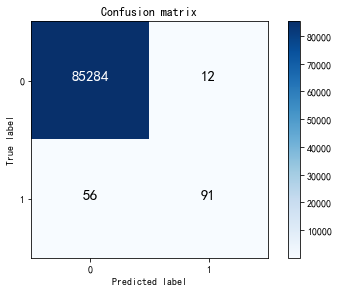

In [12]:
import itertools
cnf_matrix = confusion_matrix(y_test,y_pred)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("准确率: ", (cnf_matrix[1,1]+cnf_matrix[0,0])/cnf_matrix.sum())

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [13]:
LR_param_grid = { 'C': list((0.01,0.1,1,10,100))}
grid_model = GridSearchCV(LogisticRegression(penalty = 'l1'),param_grid=LR_param_grid,scoring='recall', cv=5)
#设置GridSearchCV（）中的scoring参数，可以选择不同的评估标准
grid_model.fit(X_train.values, y_train.values.ravel())
grid_model.grid_scores_, grid_model.best_params_, grid_model.best_score_

C:\Users\条子\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55652, std: 0.06957, params: {'C': 0.01},
  mean: 0.59130, std: 0.05054, params: {'C': 0.1},
  mean: 0.61449, std: 0.05469, params: {'C': 1},
  mean: 0.62029, std: 0.06108, params: {'C': 10},
  mean: 0.62029, std: 0.06108, params: {'C': 100}],
 {'C': 10},
 0.6202899859233522)

# 使用过采样策略，使用SMOTE算法人工合成样本

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
features_columns=columns.delete(len(columns)-1)
#.delete()删除标签列名，只留下特征列名
features=credit_cards[features_columns]#得到特征数据
labels=credit_cards['Class']#得到标签数据

In [16]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3, 
                                                                            random_state=0)

In [17]:
oversampler=SMOTE(random_state=0)#用SMOTE生成样本，实例化，使用默认参数
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)
#.fit_sample()根据训练集数据进行生成数据，自动平衡数据个数，依次传入训练集的特征数据和标签数据，依次返回过采样后的特征数据和标签数据

In [18]:
print(len(os_labels[os_labels==1]))#现在异常样本也有199019个了
print(len(os_labels[os_labels==0]))

199019
199019


In [19]:
LR_param_grid = { 'C': list((0.01,0.1,1,10,100))}
grid_model = GridSearchCV(LogisticRegression(penalty = 'l1'),param_grid=LR_param_grid,scoring='recall', cv=5)
#设置GridSearchCV（）中的scoring参数，可以选择不同的评估标准，使用召回率recall
grid_model.fit(os_features, os_labels)
grid_model.grid_scores_, grid_model.best_params_, grid_model.best_score_

C:\Users\条子\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.97152, std: 0.00025, params: {'C': 0.01},
  mean: 0.97307, std: 0.00026, params: {'C': 0.1},
  mean: 0.97319, std: 0.00073, params: {'C': 1},
  mean: 0.97317, std: 0.00053, params: {'C': 10},
  mean: 0.97349, std: 0.00025, params: {'C': 100}],
 {'C': 100},
 0.9734949929403726)

In [20]:
# os_lr_model = grid_model.best_estimator_
#选取最好的参数的模型，实例化，然后进行测试集测试
# y_pred_oversampler = os_lr_model.predict(features_test.values)
y_pred_oversampler = grid_model.predict(features_test.values)

召回率:  0.8775510204081632
准确率:  0.9913392554100394


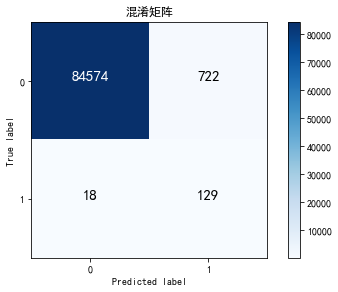

In [21]:
import itertools
cnf_matrix_oversampler = confusion_matrix(labels_test,y_pred_oversampler)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix_oversampler[1,1]/(cnf_matrix_oversampler[1,0]+cnf_matrix_oversampler[1,1]))
print("准确率: ", (cnf_matrix_oversampler[1,1]+cnf_matrix_oversampler[0,0])/cnf_matrix_oversampler.sum())


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_oversampler
                      , classes=class_names
                      , title='混淆矩阵')
plt.show()

Threshold>=0.1:
召回率:  0.9319727891156463
准确率:  0.9401589363669347
-------------------------------
Threshold>=0.2:
召回率:  0.9115646258503401
准确率:  0.9727303582505296
-------------------------------
Threshold>=0.3:
召回率:  0.8979591836734694
准确率:  0.9827253256557003
-------------------------------
Threshold>=0.4:
召回率:  0.891156462585034
准确率:  0.9883548096391747
-------------------------------
Threshold>=0.5:
召回率:  0.8775510204081632
准确率:  0.9913392554100394
-------------------------------
Threshold>=0.6:
召回率:  0.8775510204081632
准确率:  0.9934576267219082
-------------------------------
Threshold>=0.7:
召回率:  0.8707482993197279
准确率:  0.9950025162974147
-------------------------------
Threshold>=0.8:
召回率:  0.8639455782312925
准确率:  0.996243109441382
-------------------------------
Threshold>=0.9:
召回率:  0.8435374149659864
准确率:  0.9979518509415634
-------------------------------


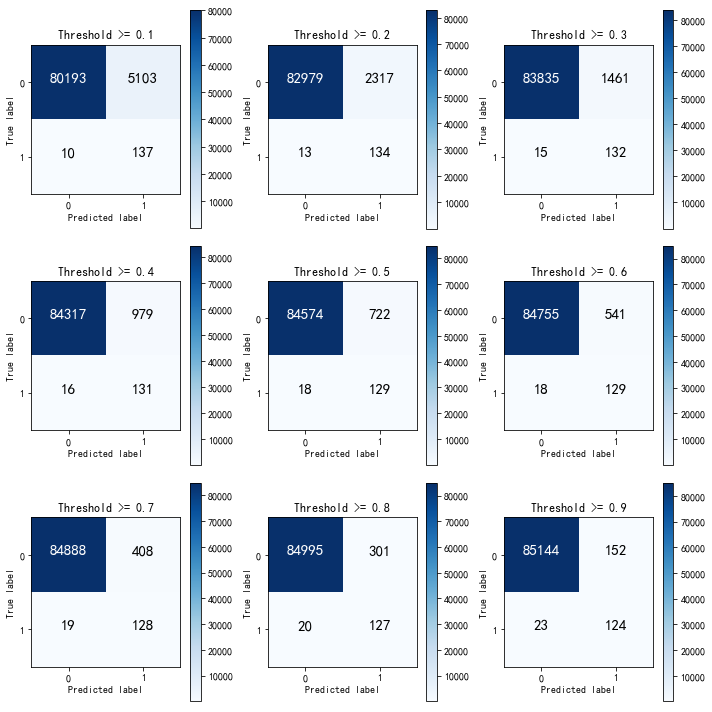

In [22]:
y_pred_oversampler_proba = grid_model.predict_proba(features_test.values)#返回模型预测 第 i 个预测样本为某个标签的概率，概率和为1

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]#设置sigmoid阈值
#print(y_pred_undersample_proba)
plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_oversampler_proba[:,1] > i#大于阈值的就返回TRUE
    
    plt.subplot(3,3,j)#创建子图
    j += 1
    
   
    cnf_matrix = confusion_matrix(labels_test,y_test_predictions_high_recall)#
    np.set_printoptions(precision=2)

    print("Threshold>=%s:"%i)
    print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("准确率: ", (cnf_matrix[1,1]+cnf_matrix[0,0])/cnf_matrix.sum())
    print("-------------------------------")

    
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 